In [1]:
# Import necessary libraries
import numpy as np
from matplotlib import pyplot as plt
import time
import os
from sklearn.model_selection import train_test_split

#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#from sklearn.decomposition import PCA

import tensorflow as tf

from tensorflow.keras import models, layers
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# for data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.models import load_modelfrom tensorflow.keras.callbacks import EarlyStopping

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

2024-11-24 21:47:29.595829: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-24 21:47:29.600565: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-24 21:47:29.612997: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732477649.634940    4892 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732477649.640755    4892 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-24 21:47:29.663318: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
# Load and preprocess CIFAR-10 data
(train_images, train_labels), (testing_images, testing_labels) = cifar10.load_data()

# 40k training
# 10k validating
# 10k testing
# Further split training set into training and validation sets
train_images, validation_images, train_labels, validation_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)
# test_size=0.2 is the proportion of the dataset to be used for validation set
# random_state=42 the split will always produce the same subsets of training and validation data
# ensuring consistency in your experiment

In [3]:
# Normalize image data to the range [0, 1]
train_images = train_images.astype('float32') / 255.0
validation_images = validation_images.astype('float32') / 255.0
testing_images = testing_images.astype('float32')/255.0

In [29]:
model_checkpoint = ModelCheckpoint(
    filepath='best_model-1b.keras',  # Save the best model to a file
    monitor='val_loss',       # Save the model with the lowest validation loss
    save_best_only=True       # Only save when there's an improvement
)

In [30]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=4,          # Stop training if val_loss doesn't improve for 3 consecutive epochs
    restore_best_weights=True  # Restore weights from the epoch with the best val_loss
)
# CHANGING THE KERNEL SIZE TO (7X7) 

modelb = models.Sequential()
input_shape=(32, 32, 3)

# CNN part with a single Conv2D and MaxPooling2D
modelb.add(Conv2D(16, (7, 7), activation='relu', input_shape = input_shape, strides=(1,1), padding='valid'))
modelb.add(MaxPooling2D((2, 2)))

# Flatten the output and add a fully connected layer (MLP)
modelb.add(Flatten())
modelb.add(Dense(32, activation='relu'))

# Output layer with softmax for classification (CIFAR-10 has 10 classes)
modelb.add(Dense(10, activation='softmax'))

# Compile the modelν παραμέτρων του Conv2D layer. 
modelb.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
modelb.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 16)     │         2,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2704)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │        86,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,258 (348.66 KB)

 Trainable params: 89,258 (348.66 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# INITIAL 40K IMAGES TRAINING DATA

start_time = time.time()

history = modelb.fit(
    train_images,
    train_labels,
    epochs=15, # EARLY_STOPPING WILL DEAL WITH OVERFITTING,
    batch_size=32,
    validation_data=(validation_images, validation_labels),
    shuffle=True,
    #callbacks=[early_stopping, model_checkpoint]
)
# Print the epoch where training stopped
print(f"Training stopped at epoch {len(history.history['loss'])}")

end_time = time.time()
total_time = end_time - start_time
print(f"Total training time: {total_time:.2f} seconds")

# Extract accuracy and loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
#print(train_loss, val_loss, train_accuracy, val_accuracy)# TESTING

Epoch 1/15


2024-11-24 21:59:01.289273: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3364 - loss: 1.8132

2024-11-24 21:59:28.182612: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.3365 - loss: 1.8131 - val_accuracy: 0.4914 - val_loss: 1.4201
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.5000 - loss: 1.4131 - val_accuracy: 0.5152 - val_loss: 1.3589
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.5441 - loss: 1.3008 - val_accuracy: 0.5447 - val_loss: 1.2892
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.5682 - loss: 1.2343 - val_accuracy: 0.5550 - val_loss: 1.2818
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.5952 - loss: 1.1583 - val_accuracy: 0.5705 - val_loss: 1.2138
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.6094 - loss: 1.1249 - val_accuracy: 0.5877 - val_loss: 1.2047
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.6242 - loss: 1.0863 - val_accuracy: 0.5590 - val_loss: 1.2533
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.6301 - loss: 1.06

In [13]:
# TESTING
test_loss, test_accuracy = modelb.evaluate(testing_images, testing_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6067 - loss: 1.1507


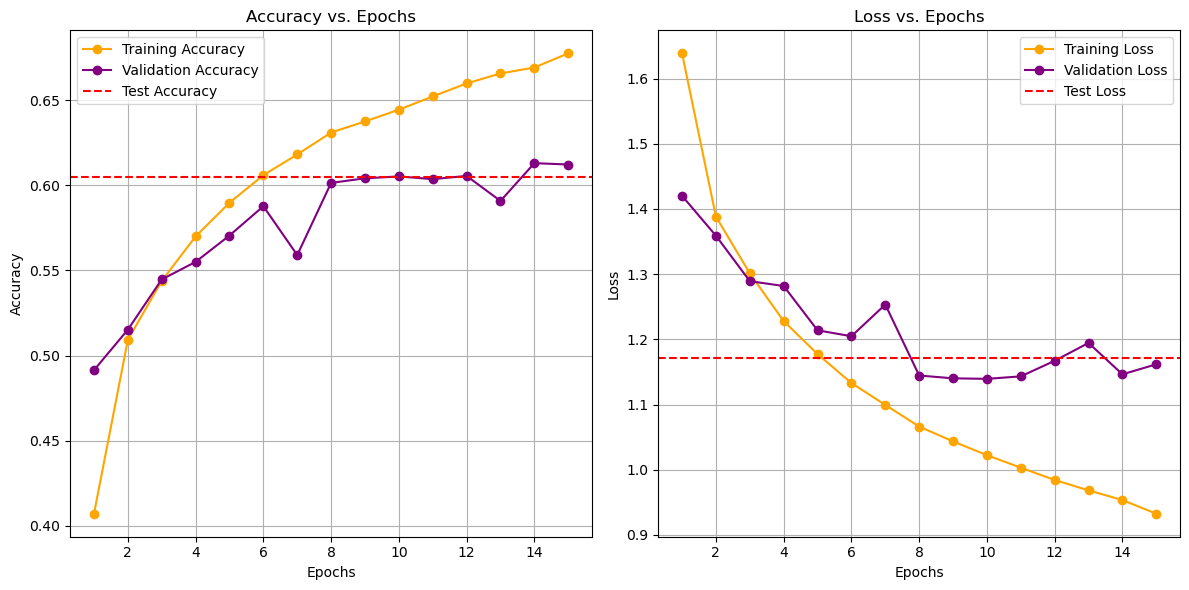

In [14]:
# Plot training and validation accuracy/loss
epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(epochs, train_accuracy, color='orange', label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, color='purple', label='Validation Accuracy', marker='o')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(epochs, train_loss, color='orange', label='Training Loss', marker='o')
plt.plot(epochs, val_loss, color='purple', label='Validation Loss', marker='o')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=4,          # Stop training if val_loss doesn't improve for 3 consecutive epochs
    restore_best_weights=True  # Restore weights from the epoch with the best val_loss
)

# CHANGING THE STRIDE 

modelc = models.Sequential()
input_shape=(32, 32, 3)

# CNN part with a single Conv2D and MaxPooling2D
modelc.add(Conv2D(16, (3, 3), activation='relu', input_shape = input_shape, strides=(2,2), padding='valid'))
modelc.add(MaxPooling2D((2, 2)))

# Flatten the output and add a fully connected layer (MLP)
modelc.add(Flatten())
modelc.add(Dense(32, activation='relu'))

# Output layer with softmax for classification (CIFAR-10 has 10 classes)
modelc.add(Dense(10, activation='softmax'))

# Compile the model
modelc.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
modelc.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,898 (101.16 KB)

 Trainable params: 25,898 (101.16 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# INITIAL 40K IMAGES TRAINING DATA

start_time = time.time()

history = modelc.fit(
    train_images,
    train_labels,
    epochs=15, # EARLY_STOPPING WILL DEAL WITH OVERFITTING,
    batch_size=32,
    validation_data=(validation_images, validation_labels),
    shuffle=True,
    #callbacks=[early_stopping, model_checkpoint]
)
# Print the epoch where training stopped
print(f"Training stopped at epoch {len(history.history['loss'])}")

end_time = time.time()
total_time = end_time - start_time
print(f"Total training time: {total_time:.2f} seconds")

# Extract accuracy and loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
#print(train_loss, val_loss, train_accuracy, val_accuracy)# TESTING

Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2788 - loss: 1.9975 - val_accuracy: 0.4408 - val_loss: 1.5645
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4676 - loss: 1.5040 - val_accuracy: 0.5085 - val_loss: 1.3872
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5145 - loss: 1.3695 - val_accuracy: 0.5217 - val_loss: 1.3432
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5481 - loss: 1.2900 - val_accuracy: 0.5425 - val_loss: 1.2841
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5669 - loss: 1.2344 - val_accuracy: 0.5595 - val_loss: 1.2540
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5790 - loss: 1.2064 - val_accuracy: 0.5600 - val_loss: 1.2510
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5811 - loss: 1.1900 - val_accuracy: 0.5645 - val_loss: 1.2481
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5928 - loss: 1.1692 - 

In [17]:
# TESTING
test_loss, test_accuracy = modelc.evaluate(testing_images, testing_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5889 - loss: 1.1808


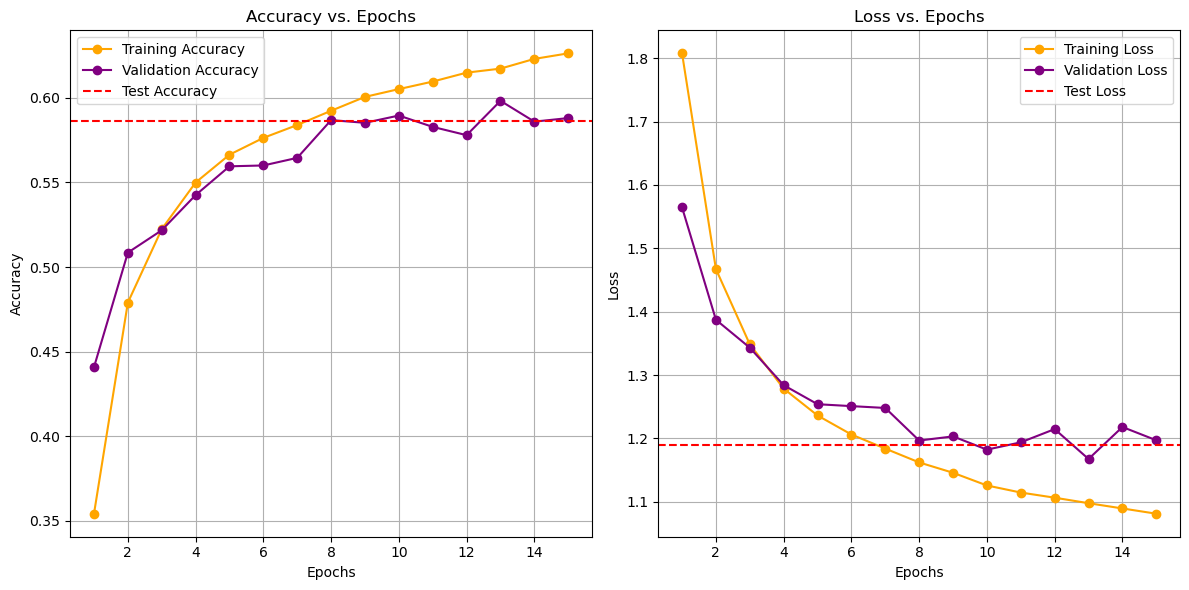

In [18]:
# Plot training and validation accuracy/loss
epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(epochs, train_accuracy, color='orange', label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, color='purple', label='Validation Accuracy', marker='o')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(epochs, train_loss, color='orange', label='Training Loss', marker='o')
plt.plot(epochs, val_loss, color='purple', label='Validation Loss', marker='o')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=4,          # Stop training if val_loss doesn't improve for 3 consecutive epochs
    restore_best_weights=True  # Restore weights from the epoch with the best val_loss
)

# ADDING A CONV2D LAYER  of 32 filters

modelf = models.Sequential()
input_shape=(32, 32, 3)

# CNN part with a single Conv2D and MaxPooling2D
modelf.add(Conv2D(32, (3, 3), activation='relu', input_shape = input_shape, strides=(1,1), padding='valid'))
modelf.add(MaxPooling2D((2, 2)))

modelf.add(Conv2D(32, (3, 3), activation='relu', strides=(1,1), padding='valid'))
modelf.add(MaxPooling2D((2, 2)))

# Flatten the output and add a fully connected layer (MLP)
modelf.add(Flatten())
modelf.add(Dense(32, activation='relu'))

# Output layer with softmax for classification (CIFAR-10 has 10 classes)
modelf.add(Dense(10, activation='softmax'))

# Compile the model
modelf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
modelf.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,370 (185.04 KB)

 Trainable params: 47,370 (185.04 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# INITIAL 40K IMAGES TRAINING DATA

start_time = time.time()

history = modelf.fit(
    train_images,
    train_labels,
    epochs=15, # EARLY_STOPPING WILL DEAL WITH OVERFITTING,
    batch_size=32,
    validation_data=(validation_images, validation_labels),
    shuffle=True,
    #callbacks=[early_stopping, model_checkpoint]
)
# Print the epoch where training stopped
print(f"Training stopped at epoch {len(history.history['loss'])}")

end_time = time.time()
total_time = end_time - start_time
print(f"Total training time: {total_time:.2f} seconds")

# Extract accuracy and loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
#print(train_loss, val_loss, train_accuracy, val_accuracy)# TESTING

Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 46s 35ms/step - accuracy: 0.2767 - loss: 1.9623 - val_accuracy: 0.4554 - val_loss: 1.4925
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 33ms/step - accuracy: 0.4738 - loss: 1.4550 - val_accuracy: 0.5131 - val_loss: 1.3395
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.5243 - loss: 1.3306 - val_accuracy: 0.5379 - val_loss: 1.2947
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.5594 - loss: 1.2439 - val_accuracy: 0.5482 - val_loss: 1.2472
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.5773 - loss: 1.1939 - val_accuracy: 0.5661 - val_loss: 1.1892
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.5987 - loss: 1.1400 - val_accuracy: 0.5992 - val_loss: 1.1241
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.6149 - loss: 1.0963 - val_accuracy: 0.5992 - val_loss: 1.1299
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 33ms/step - accuracy: 0.6233 -

In [23]:
# TESTING
test_loss, test_accuracy = modelf.evaluate(testing_images, testing_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6356 - loss: 1.0540


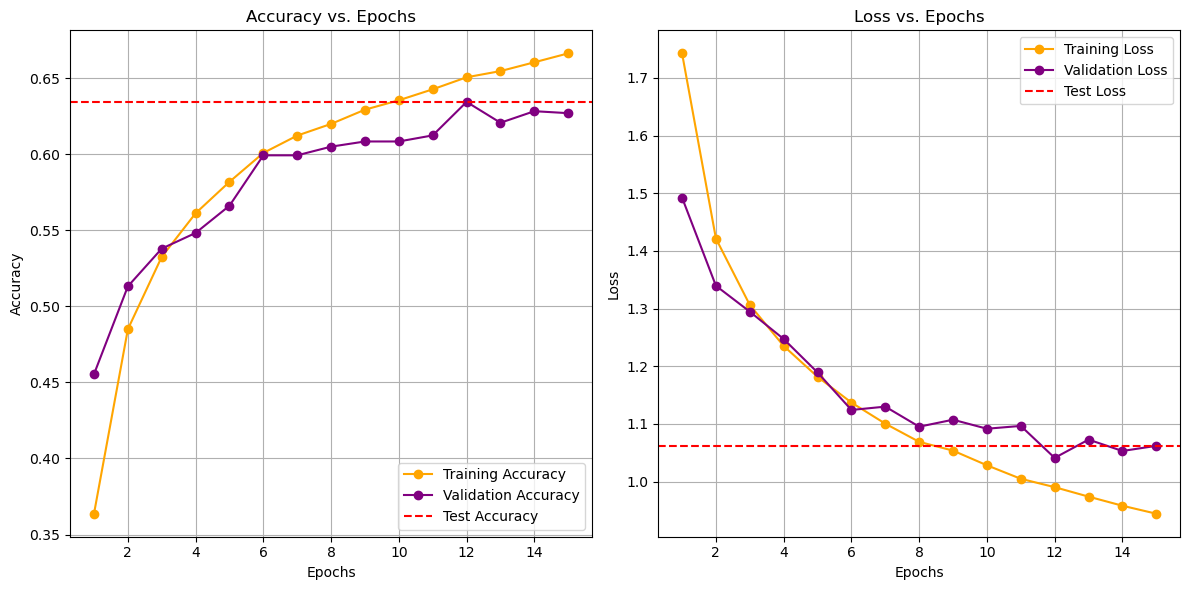

In [24]:
# Plot training and validation accuracy/loss
epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(epochs, train_accuracy, color='orange', label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, color='purple', label='Validation Accuracy', marker='o')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(epochs, train_loss, color='orange', label='Training Loss', marker='o')
plt.plot(epochs, val_loss, color='purple', label='Validation Loss', marker='o')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=4,          # Stop training if val_loss doesn't improve for 3 consecutive epochs
    restore_best_weights=True  # Restore weights from the epoch with the best val_loss
)

# ADDING MORE NEURONS TO THE DENSE LAYER

modeli = models.Sequential()
input_shape=(32, 32, 3)

# CNN part with a single Conv2D and MaxPooling2D
modeli.add(Conv2D(32, (3, 3), activation='relu', input_shape = input_shape, strides=(1,1), padding='valid'))
modeli.add(MaxPooling2D((2, 2)))

# Flatten the output and add a fully connected layer (MLP)
modeli.add(Flatten())
modeli.add(Dense(64, activation='relu'))

# Output layer with softmax for classification (CIFAR-10 has 10 classes)
modeli.add(Dense(10, activation='softmax'))

# Compile the model
modeli.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
modeli.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │       460,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 462,410 (1.76 MB)

 Trainable params: 462,410 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# INITIAL 40K IMAGES TRAINING DATA

start_time = time.time()

history = modeli.fit(
    train_images,
    train_labels,
    epochs=15, # EARLY_STOPPING WILL DEAL WITH OVERFITTING,
    batch_size=32,
    validation_data=(validation_images, validation_labels),
    shuffle=True,
    #callbacks=[early_stopping, model_checkpoint]
)
# Print the epoch where training stopped
print(f"Training stopped at epoch {len(history.history['loss'])}")

end_time = time.time()
total_time = end_time - start_time
print(f"Total training time: {total_time:.2f} seconds")

# Extract accuracy and loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
#print(train_loss, val_loss, train_accuracy, val_accuracy)# TESTING

Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 48s 37ms/step - accuracy: 0.3598 - loss: 1.7587 - val_accuracy: 0.5397 - val_loss: 1.3281
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.5551 - loss: 1.2622 - val_accuracy: 0.5765 - val_loss: 1.2081
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - accuracy: 0.6009 - loss: 1.1418 - val_accuracy: 0.6004 - val_loss: 1.1633
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.6355 - loss: 1.0536 - val_accuracy: 0.6173 - val_loss: 1.1112
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 46s 35ms/step - accuracy: 0.6585 - loss: 0.9868 - val_accuracy: 0.6086 - val_loss: 1.1320
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.6708 - loss: 0.9481 - val_accuracy: 0.6086 - val_loss: 1.1309
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 47s 37ms/step - accuracy: 0.6850 - loss: 0.9053 - val_accuracy: 0.6315 - val_loss: 1.0933
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.7044 -

In [27]:
# TESTING
test_loss, test_accuracy = modeli.evaluate(testing_images, testing_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6256 - loss: 1.1795


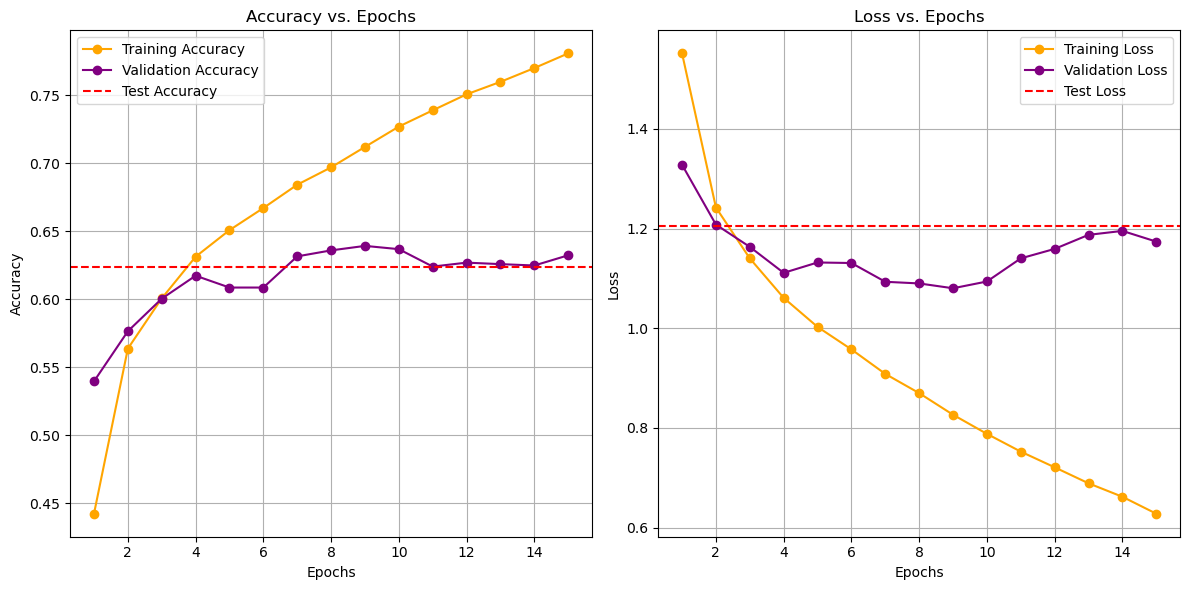

In [28]:
# Plot training and validation accuracy/loss
epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(epochs, train_accuracy, color='orange', label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, color='purple', label='Validation Accuracy', marker='o')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(epochs, train_loss, color='orange', label='Training Loss', marker='o')
plt.plot(epochs, val_loss, color='purple', label='Validation Loss', marker='o')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [31]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=4,          # Stop training if val_loss doesn't improve for 3 consecutive epochs
    restore_best_weights=True  # Restore weights from the epoch with the best val_loss
)

# ADDING A 3d CONV2D LAYER  of 128 filters

modelk = models.Sequential()
input_shape=(32, 32, 3)

# CNN part with a single Conv2D and MaxPooling2D
modelk.add(Conv2D(32, (3, 3), activation='relu', input_shape = input_shape, strides=(1,1), padding='valid'))
modelk.add(MaxPooling2D((2, 2)))

modelk.add(Conv2D(64, (3, 3), activation='relu', strides=(1,1), padding='valid'))
modelk.add(MaxPooling2D((2, 2)))

modelk.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
modelk.add(layers.MaxPooling2D((2, 2)))

# Flatten the output and add a fully connected layer (MLP)
modelk.add(Flatten())
modelk.add(Dense(32, activation='relu'))

# Output layer with softmax for classification (CIFAR-10 has 10 classes)
modelk.add(Dense(10, activation='softmax'))

# Compile the model
modelk.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
modelk.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 6, 6, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,474 (509.66 KB)

 Trainable params: 130,474 (509.66 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# INITIAL 40K IMAGES TRAINING DATA

start_time = time.time()

history = modelk.fit(
    train_images,
    train_labels,
    epochs=15, # EARLY_STOPPING WILL DEAL WITH OVERFITTING,
    batch_size=32,
    validation_data=(validation_images, validation_labels),
    shuffle=True,
    #callbacks=[early_stopping, model_checkpoint]
)
# Print the epoch where training stopped
print(f"Training stopped at epoch {len(history.history['loss'])}")

end_time = time.time()
total_time = end_time - start_time
print(f"Total training time: {total_time:.2f} seconds")

# Extract accuracy and loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
#print(train_loss, val_loss, train_accuracy, val_accuracy)# TESTING

Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - accuracy: 0.2806 - loss: 1.9135 - val_accuracy: 0.5158 - val_loss: 1.3470
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.5387 - loss: 1.2766 - val_accuracy: 0.6003 - val_loss: 1.1260
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 0.6055 - loss: 1.1117 - val_accuracy: 0.6415 - val_loss: 1.0355
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.6520 - loss: 0.9890 - val_accuracy: 0.6486 - val_loss: 0.9994
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.6852 - loss: 0.8939 - val_accuracy: 0.6683 - val_loss: 0.9679
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 54s 43ms/step - accuracy: 0.7216 - loss: 0.8001 - val_accuracy: 0.6875 - val_loss: 0.9180
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 86s 69ms/step - accuracy: 0.7397 - loss: 0.7400 - val_accuracy: 0.6895 - val_loss: 0.8964
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 95s 76ms/step - accuracy: 0.7641 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.7000 - loss: 1.0446


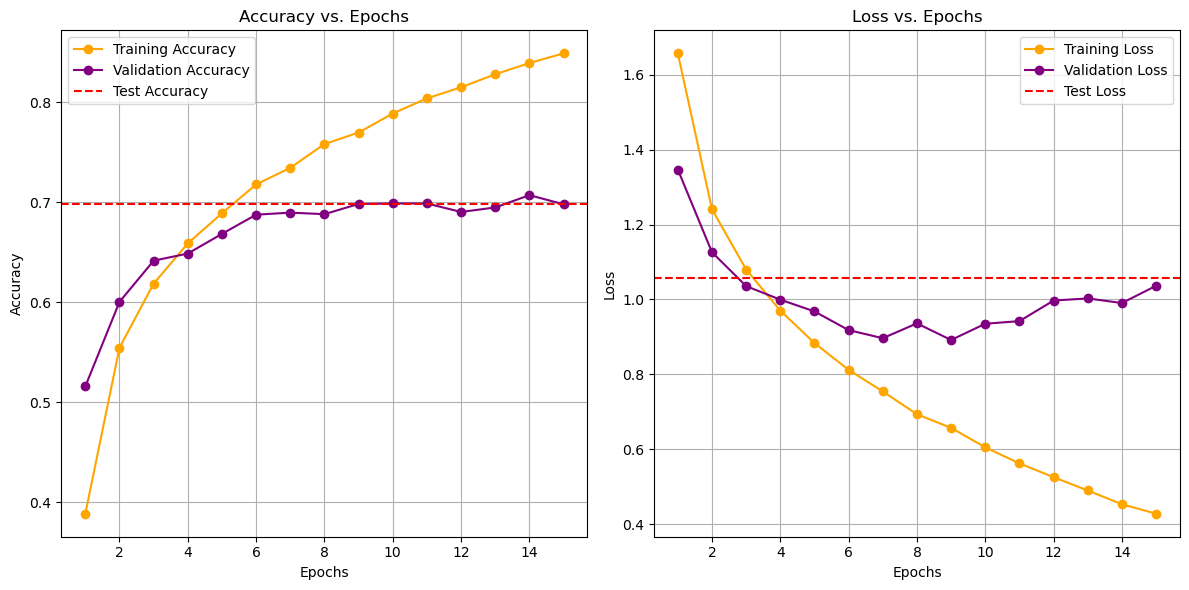

In [33]:
# TESTING
test_loss, test_accuracy = modelk.evaluate(testing_images, testing_labels)

# Plot training and validation accuracy/loss
epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(epochs, train_accuracy, color='orange', label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, color='purple', label='Validation Accuracy', marker='o')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(epochs, train_loss, color='orange', label='Training Loss', marker='o')
plt.plot(epochs, val_loss, color='purple', label='Validation Loss', marker='o')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()